In [1]:
import pandas as pd
import numpy as np
import scipy as scp
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Data of OAD Cleaned

In [2]:
#Initialize dataframe from excel spreadsheet
oad = pd.read_excel("oxy_avail_dataset.xls")
oad.head()

,OTUId,45A 10,45B 10,45C 10,75A 10,75B 10,75C 10,150A 10,150B 10,150C 10,...,class_confidence,order_,order_confidence,family,family_confidence,genus,genus_confidence,species,species_confidence,sequence
0,OTU_1,24014,12430,477,231,35910,9801,6183,22212,5628,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylophilus,1.00,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGATGAA...
1,OTU_2,20188,24781,13429,22430,22253,24440,684,688,622,...,1.0,Methylococcales,1.0,Methylococcaceae,1.0,Methylobacter,1.00,NaN,NaN,ATTGAACGCTGGCGGTATGCTTAACACATGCAAGTCGAACGGTAGC...
2,OTU_3,2417,5259,29605,790,591,8685,1698,318,105,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylotenera,1.00,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGATGAT...
3,OTU_5,289,363,208,259,366,331,18787,10820,5755,...,1.0,Methylococcales,1.0,Methylococcaceae,1.0,Methylosarcina,1.00,NaN,NaN,ATTGAACGCTGGCGGTATGCTTAACACATGCAAGTCGAACGGTAAC...
4,OTU_4,98,98,5834,856,361,192,72,199,72,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylotenera,0.95,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGGCAGC...


In [3]:
#Drop rows that describe the index and set the index
oad_cleaned = oad.loc[:, :'225C 16'].set_index('OTUId')
oad_cleaned.head()

,45A 10,45B 10,45C 10,75A 10,75B 10,75C 10,150A 10,150B 10,150C 10,15A 10,...,75C 16,150A 16,150B 16,150C 16,15A 16,15B 16,15C 16,225A 16,225B 16,225C 16
OTUId,,,,,,,,,,,,,,,,,,,,,
OTU_1,24014,12430,477,231,35910,9801,6183,22212,5628,239,...,5380,4219,7319,16424,187,198,407,10191,10663,3043
OTU_2,20188,24781,13429,22430,22253,24440,684,688,622,12923,...,5242,380,462,1213,5432,6266,8964,1274,660,212
OTU_3,2417,5259,29605,790,591,8685,1698,318,105,785,...,9096,1619,396,545,5873,3991,423,689,326,70
OTU_5,289,363,208,259,366,331,18787,10820,5755,176,...,90,2536,1912,74,67,83,88,2604,4620,2865
OTU_4,98,98,5834,856,361,192,72,199,72,17345,...,254,34,119,103,1671,4136,2690,47,0,9


In [4]:
#Make list of indecies and column headers
samples = list(oad_cleaned.index.values)
sites = list(oad_cleaned)

## Data of OAD Normalized (with samples as the rows and sites as the columns)

In [5]:
#Normalize cleaned data
# use this one: standard scalar - 0 value of the vector = 0, and the unit variance - will be between -0.5-0.5
# also make labels as species/samples not PC1 
scaler = preprocessing.StandardScaler()
scaler_df = scaler.fit_transform(oad_cleaned)
oad_norm = pd.DataFrame(scaler_df, index=samples, columns=sites)
#oad_norm.columns = columns
oad_norm

C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,45A 10,45B 10,45C 10,75A 10,75B 10,75C 10,150A 10,150B 10,150C 10,15A 10,...,75C 16,150A 16,150B 16,150C 16,15A 16,15B 16,15C 16,225A 16,225B 16,225C 16
OTU_1,12.094017,6.934438,0.120995,0.048391,13.477260,5.538181,4.816835,13.985559,5.727171,0.068125,...,7.180294,12.660791,14.678848,15.655486,0.242522,0.243085,0.601609,14.080376,13.899250,11.492981
OTU_2,10.151444,13.926096,6.364506,14.474022,8.315568,13.971257,0.442069,0.325602,0.505285,9.361409,...,6.993217,1.017407,0.820770,1.075109,10.320904,11.555838,15.159325,1.660153,0.758478,0.706077
OTU_3,1.128582,2.875075,14.162147,0.411647,0.128369,4.895288,1.248763,0.090786,-0.034011,0.468167,...,12.217798,4.775196,0.687384,0.434803,11.168295,7.314488,0.628829,0.845324,0.319708,0.165017
OTU_5,0.048134,0.103546,-0.008677,0.066586,0.043330,0.082806,14.844031,6.755758,5.859648,0.021966,...,0.009034,7.556385,3.751238,-0.016670,0.011939,0.028687,0.058905,3.512670,5.960663,10.814751
OTU_4,-0.048842,-0.046466,2.703336,0.454536,0.041440,0.002732,-0.044812,0.015264,-0.068434,12.601309,...,0.231357,-0.031984,0.127563,0.011127,3.094060,7.584816,4.485595,-0.048899,-0.108553,-0.067410
OTU_239,-0.068136,-0.057221,-0.087251,-0.068579,-0.068544,-0.066396,2.156493,1.778289,-0.027752,-0.077678,...,-0.079082,1.147823,0.260950,-0.068432,-0.101431,-0.049615,-0.046573,5.918157,4.537944,-0.036928
OTU_10,0.311646,-0.060052,0.440594,0.295327,0.183550,0.044209,-0.096523,0.093324,2.271296,0.771495,...,-0.061459,-0.077477,-0.078580,1.784429,0.327069,0.640187,-0.005743,-0.086507,-0.108553,-0.090272
OTU_8,-0.071690,-0.096847,-0.083877,-0.096522,0.234196,-0.099808,-0.086977,-0.041854,8.014745,-0.101124,...,-0.100772,-0.116905,2.950917,0.611174,-0.103352,-0.116731,-0.084001,-0.106007,-0.108553,-0.097893
OTU_7,-0.087938,-0.096847,-0.100748,-0.085475,-0.084796,-0.095775,-0.085386,-0.100240,10.526591,-0.100391,...,-0.112972,-0.135103,-0.112937,-0.087602,-0.116803,-0.126052,-0.090806,-0.114364,-0.108553,-0.101703
OTU_6,-0.090984,-0.096847,-0.104605,6.173712,-0.087819,-0.103840,-0.092546,-0.100875,-0.129978,-0.098193,...,-0.110261,-0.135103,-0.112937,-0.087602,-0.116803,-0.126052,-0.090806,-0.114364,-0.108553,-0.101703


In [6]:
#Make PCA object
pca_norm = PCA()

#Fit and scale PCA data
pca_norm.fit(oad_norm)
pca_data_norm = pca_norm.transform(oad_norm)

#Generate values for scree plot (variance explained) and save to csv file
var_exp_norm = np.round(pca_norm.explained_variance_ratio_*100, decimals=2)
#var_exp_norm.tofile('Explained_Variance_of_Overall.csv')

#Create scree list and append
scree_list_norm = []
scree_list_norm.append(var_exp_norm)

#Label columns
col_labels_norm = ['PC' + str(x) for x in range(1, len(var_exp_norm) + 1)]

#Generate new dataframe of PCA principal components and save to csv file
pca_df_norm = pd.DataFrame(pca_data_norm, columns = col_labels_norm)
#pca_df_norm.to_csv('PCA1_of_Overall_Data')
pca_df_norm.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,45.679620,-25.407040,-1.389159,-3.849059,4.699135,1.114343,-0.682810,0.176589,-0.263292,-0.001507,...,0.002642,0.000185,0.001076,-0.001284,-0.000397,0.000857,0.000394,-0.000244,-0.000225,0.000046
1,35.297139,28.569831,-10.462378,-1.665631,-4.784779,-0.874524,0.324282,-0.501402,0.155096,-0.038105,...,-0.005689,-0.001528,-0.003830,0.001540,-0.000409,-0.000199,-0.000268,-0.000044,0.000058,-0.000067
2,16.974071,16.472947,22.449593,-1.357360,1.696772,0.558027,-0.121207,0.295897,-0.043023,-0.111413,...,0.000965,-0.000813,0.000581,0.000218,-0.000865,0.000438,-0.000409,0.000038,0.000076,0.000032
3,12.683606,-12.980649,4.722899,11.849319,-9.819517,-3.242744,-1.891397,-0.215673,0.123894,-0.041837,...,-0.002092,0.004637,-0.000255,0.004818,0.000409,-0.003437,-0.001034,-0.003157,0.001817,-0.000091
4,5.632669,9.650041,-3.782839,14.237063,9.827090,0.899413,-0.304533,0.339625,-0.118998,-0.185278,...,-0.000585,-0.002187,-0.003213,0.000246,0.000222,0.000519,-0.001088,-0.000429,-0.000138,0.000082


In [7]:
#Convert from a np.array to df
scree_norm = np.array(scree_list_norm)
scree_norm = pd.DataFrame(scree_norm)
scree_norm

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,51.46,26.76,8.68,5.0,3.49,2.32,1.24,0.45,0.21,0.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


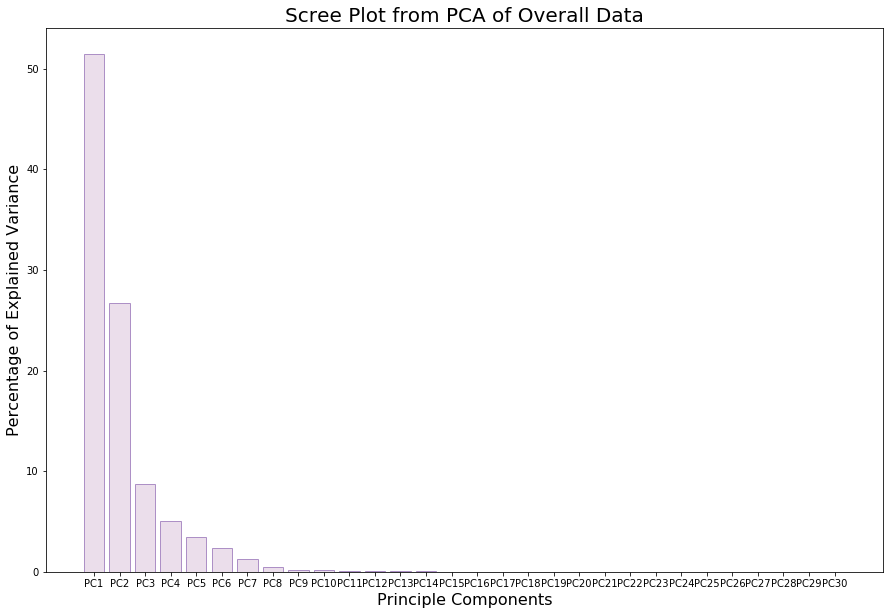

In [8]:
#Make Scree Plot of transposed data - norm data
#Initialize figure
fig = plt.figure(figsize=(15,10))

#Plot histogram
plt.bar(x = range(1, len(var_exp_norm) + 1), height = var_exp_norm, tick_label = col_labels_norm, color = 'thistle', edgecolor = 'rebeccapurple', alpha=0.5)

#Titles and lables
plt.ylabel('Percentage of Explained Variance', fontsize=16)
plt.xlabel('Principle Components', fontsize=16)
plt.title("Scree Plot from PCA of Overall Data", fontsize=20)

plt.show()

In [10]:
#Determine loading scores for normalized data
# Calculate Loading Scores of PC1
ls_norm = pd.DataFrame(np.abs(pca_norm.components_[0]), index = sites, columns = ['Loading Score'])
# Sort the loading scores based on their magnitude
sorted_norm = ls_norm.abs().sort_values(by = ['Loading Score'], ascending = False)
sorted_norm

,Loading Score
45A 10,0.241248
75B 10,0.236505
75B 16,0.235797
45A 16,0.234882
45B 10,0.222904
75C 10,0.215739
150A 16,0.207881
225A 16,0.205075
75C 16,0.204033
225C 10,0.202732


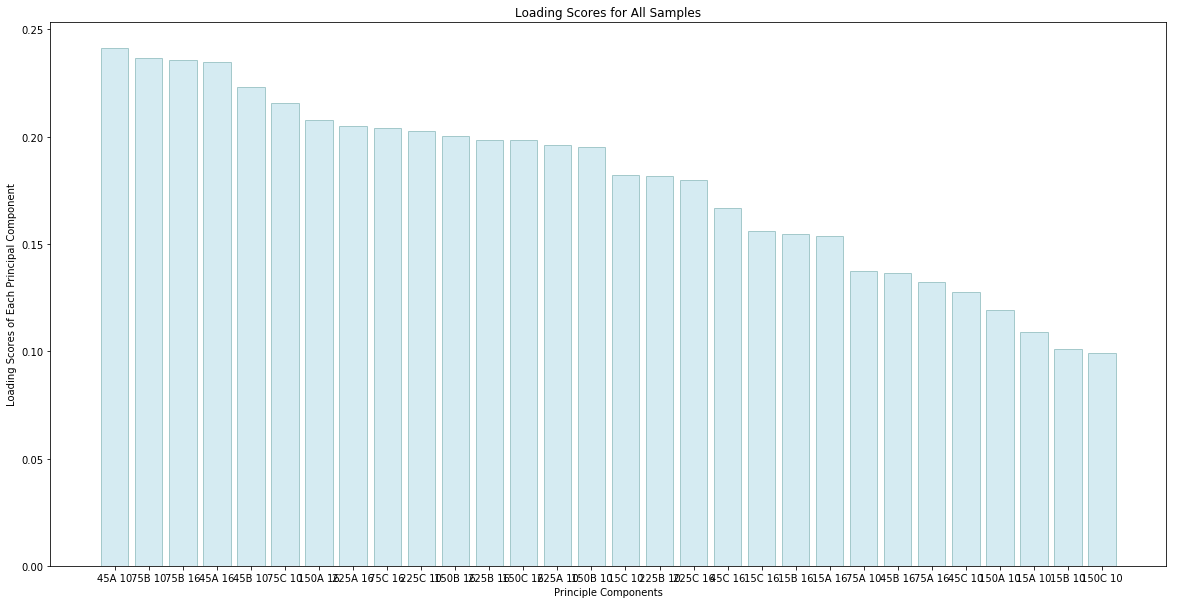

In [31]:
#Rough plot of all loading scores
#Initialize figure
fig2 = plt.figure(figsize=(20,10))

#Plot histogram
plt.bar(list(sorted_norm.index), sorted_norm['Loading Score'], edgecolor = 'cadetblue', color = 'lightblue', alpha=0.5)

#Titles and lables
plt.ylabel('Loading Scores of Each Principal Component')
plt.xlabel('Principle Components')
plt.title('Loading Scores for All Samples')

plt.show()

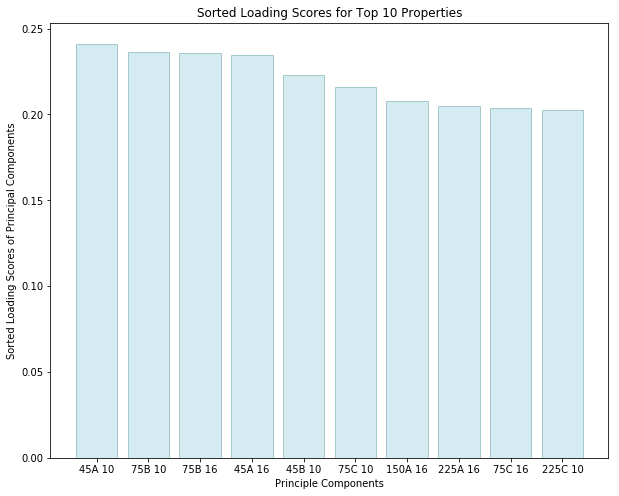

In [39]:
#Rough plot of top ten PCs
#Initialize figure
fig2 = plt.figure(figsize=(10,8))

#Plot histogram
plt.bar(list(sorted_norm.index)[0:10], sorted_norm['Loading Score'].iloc[0:10], edgecolor = 'cadetblue', color = 'lightblue', alpha=0.5)

#Titles and lables
plt.ylabel('Sorted Loading Scores of Principal Components')
plt.xlabel('Principle Components')
plt.title('Sorted Loading Scores for Top 10 Properties')

plt.show()

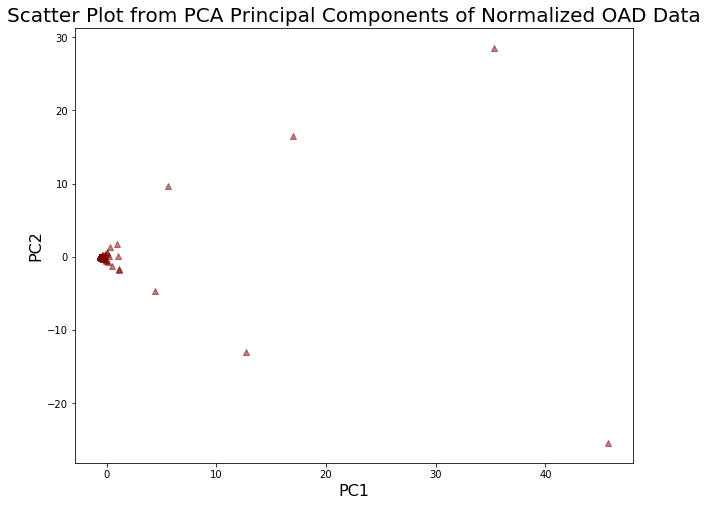

In [23]:
#Scatter Plot of transposed data
#Initialize figure
fig2 = plt.figure(figsize=(10,8))

#Plot scatter plot
plt.scatter(x = pca_df_norm['PC1'], y = pca_df_norm['PC2'], alpha=0.5, marker='^', color='maroon')

#Titles and lables
plt.ylabel('PC2', fontsize=16)
plt.xlabel('PC1', fontsize=16)
plt.title("Scatter Plot from PCA Principal Components of Normalized OAD Data", fontsize=20)

plt.show()

## Data of OAD Normalized and Transposed (with sites as the rows and samples as the columns)

In [12]:
#Transpose cleaned data table to get the index to be the sites and the columns to be the samples
oad_t = oad_cleaned.T
oad_t

OTUId,OTU_1,OTU_2,OTU_3,OTU_5,OTU_4,OTU_239,OTU_10,OTU_8,OTU_7,OTU_6,...,OTU_43,OTU_47,OTU_48,OTU_52,OTU_56,OTU_58,OTU_73,OTU_88,OTU_89,OTU_97
45A 10,24014,20188,2417,289,98,60,808,53,21,15,...,0,0,0,0,0,0,0,0,0,0
45B 10,12430,24781,5259,363,98,79,74,9,9,9,...,0,0,0,0,0,0,0,0,0,0
45C 10,477,13429,29605,208,5834,45,1140,52,17,9,...,0,0,0,0,0,0,0,0,0,0
75A 10,231,22430,790,259,856,51,611,8,25,9657,...,0,0,0,0,0,0,0,0,0,0
75B 10,35910,22253,591,366,361,70,737,871,27,19,...,0,0,0,0,0,0,0,0,0,0
75C 10,9801,24440,8685,331,192,72,264,14,21,7,...,0,0,0,0,0,0,0,0,0,0
150A 10,6183,684,1698,18787,72,2839,7,19,21,12,...,0,0,0,0,0,0,0,0,0,0
150B 10,22212,688,318,10820,199,2977,322,109,17,16,...,0,0,0,0,0,0,0,0,0,0
150C 10,5628,622,105,5755,72,111,2315,7821,10229,13,...,0,0,0,0,0,0,0,0,0,0
15A 10,239,12923,785,176,17345,40,1199,8,9,12,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Normalize cleaned data
# use this one: standard scalar - 0 value of the vector = 0, and the unit variance - will be between -0.5-0.5
# also make labels as species/samples not PC1 
scalert = preprocessing.StandardScaler()
scalert_df = scalert.fit_transform(oad_t)
norm_t = pd.DataFrame(scalert_df, index=sites, columns=samples)
#oad_norm.columns = columns
norm_t.head()

C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,OTU_1,OTU_2,OTU_3,OTU_5,OTU_4,OTU_239,OTU_10,OTU_8,OTU_7,OTU_6,...,OTU_43,OTU_47,OTU_48,OTU_52,OTU_56,OTU_58,OTU_73,OTU_88,OTU_89,OTU_97
45A 10,1.336772,1.346574,-0.217209,-0.540578,-0.363594,-0.341237,0.714353,-0.230761,-0.179170,-0.180439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45B 10,0.251132,1.876547,0.263735,-0.524346,-0.363594,-0.334236,-0.566909,-0.261761,-0.185712,-0.183903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45C 10,-0.869089,0.566671,4.383748,-0.558345,0.735408,-0.346765,1.293888,-0.231466,-0.181351,-0.183903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75A 10,-0.892144,1.605272,-0.492542,-0.547159,-0.218363,-0.344554,0.370472,-0.262466,-0.176990,5.385130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75B 10,2.451651,1.584848,-0.526219,-0.523688,-0.313204,-0.337552,0.590416,0.345555,-0.175900,-0.178131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Make PCA object
pca_t = PCA()

#Fit and scale PCA data
pca_t.fit(norm_t)
pca_data_t = pca_t.transform(norm_t)

#Generate values for scree plot (variance explained) and save to csv file
var_exp_t = np.round(pca_t.explained_variance_ratio_*100, decimals=2)
#var_exp_t.tofile('Explained_Variance_of_Overall.csv')

#Create scree list and append
scree_list_t = []
scree_list_t.append(var_exp_t)

#Label columns
col_labels_t = ['PC' + str(x) for x in range(1, len(var_exp_t) + 1)]

#Generate new dataframe of PCA principal components and save to csv file
pca_df_t = pd.DataFrame(pca_data_t, columns = col_labels_t)
#pca_df_t.to_csv('PCA1_of_Overall_Data')
pca_df_t.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-0.808299,1.938540,-1.233837,-0.205984,0.033798,-1.602444,-0.999947,0.590006,-0.128408,0.275818,...,0.102141,0.745003,1.539816,4.801474,0.781967,4.579299,-1.714199,-0.395585,0.019720,7.328795e-16
1,-0.913440,2.868445,-1.790011,-0.144966,-3.557698,-5.002115,-1.384780,-4.632824,-3.794037,-2.337292,...,1.709791,1.505522,-1.253058,-0.727790,0.154231,0.141394,-0.706220,0.154499,-0.050269,-4.427665e-17
2,-0.569659,8.093715,0.339999,0.121805,2.714972,0.708996,-1.663712,-2.150552,6.075192,-1.382740,...,0.940152,-1.305957,-0.380447,-1.286066,-0.373400,0.054122,0.291932,0.248198,-0.066662,6.773683e-16
3,-0.928268,2.635472,-0.807854,0.077326,-0.897552,-0.493131,-0.593722,-2.008704,-0.812763,-0.860355,...,5.592797,-4.206947,0.316185,0.265614,-1.013725,-0.415760,0.101077,-0.248283,-0.044322,-3.773436e-16
4,-2.672871,0.789116,-2.966097,-0.478089,-2.209914,-2.507755,-0.752220,-1.060941,-3.502605,-2.167927,...,-2.895772,-0.599377,-0.206376,-0.845531,0.000779,-0.520786,0.030987,-0.213394,-0.038681,3.998126e-16


In [16]:
#Convert from a np.array to df
scree_t = np.array(scree_list_t)
scree_t = pd.DataFrame(scree_t)
scree_t

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,8.18,7.46,5.89,5.74,5.31,4.98,4.95,4.72,4.52,4.44,...,2.04,1.84,1.74,1.53,1.33,1.23,1.03,0.77,0.44,0.0


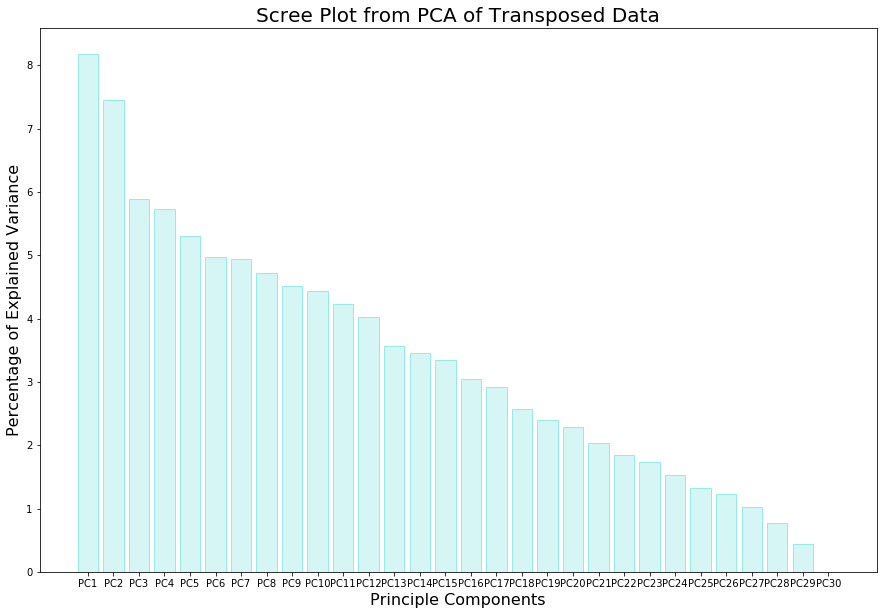

In [17]:
#Make Scree Plot of transposed data - norm data
#Initialize figure
fig = plt.figure(figsize=(15,10))

#Plot histogram
plt.bar(x = range(1, len(var_exp_t) + 1), height = var_exp_t, tick_label = col_labels_t, color = 'paleturquoise', edgecolor = 'turquoise', alpha=0.5)

#Titles and lables
plt.ylabel('Percentage of Explained Variance', fontsize=16)
plt.xlabel('Principle Components', fontsize=16)
plt.title("Scree Plot from PCA of Transposed Data", fontsize=20)

plt.show()

In [18]:
#Determine loading scores for transposed data
#Calculate Loading Scores of PC1
ls_t = pd.DataFrame(np.abs(pca_t.components_[0]), index = samples, columns = ['Loading Score'])

#Sort the loading scores based on their magnitude
sorted_t = ls_t.abs().sort_values(by = ['Loading Score'], ascending = False)
sorted_t

,Loading Score
OTU_46,0.226010
OTU_145,0.208004
OTU_29,0.194245
OTU_76,0.183998
OTU_49,0.179547
OTU_94,0.173489
OTU_61,0.173213
OTU_70,0.168763
OTU_54,0.164549
OTU_64,0.164439


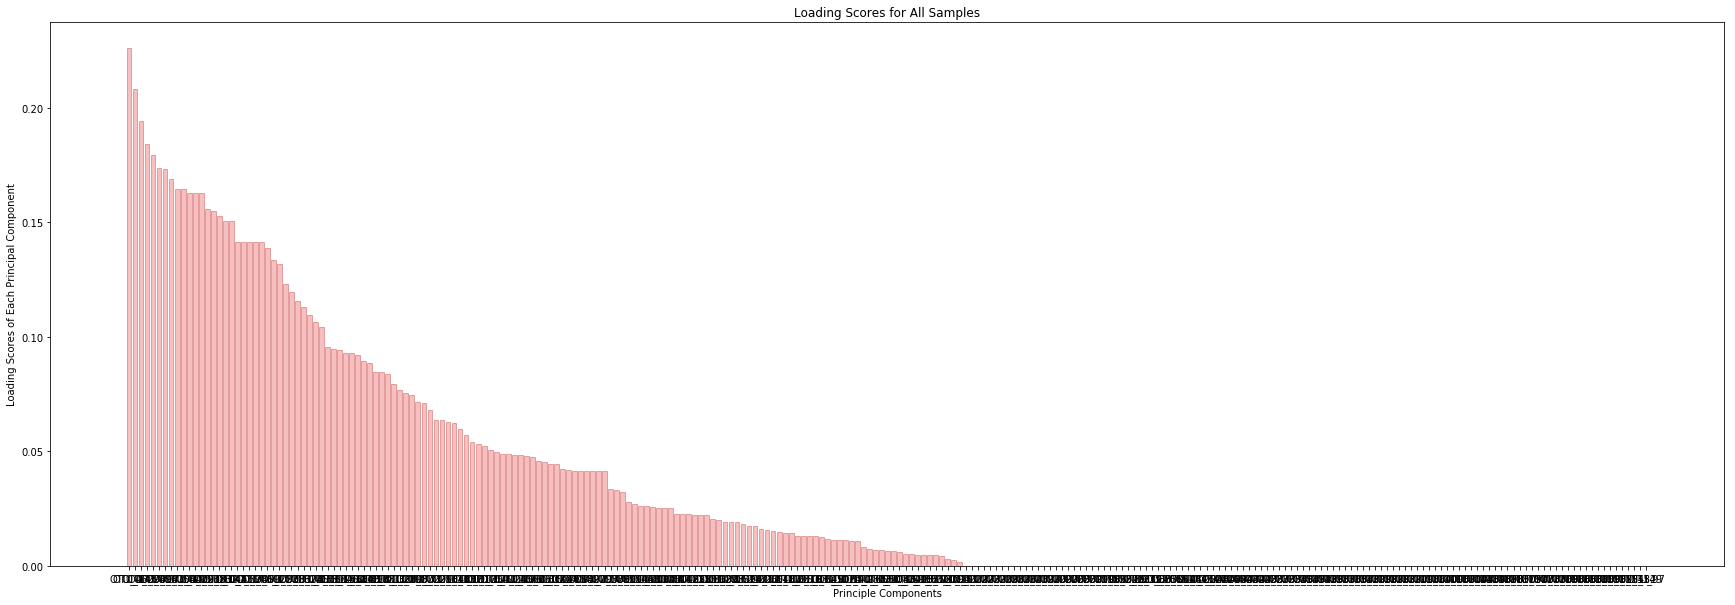

In [35]:
#Rough plot of all loading scores
#Initialize figure
fig2 = plt.figure(figsize=(30,10))

#Plot histogram
plt.bar(list(sorted_t.index), sorted_t['Loading Score'], edgecolor = 'indianred', color = 'lightcoral', alpha=0.5)

#Titles and lables
plt.ylabel('Loading Scores of Each Principal Component')
plt.xlabel('Principle Components')
plt.title('Loading Scores for All Samples')

plt.show()

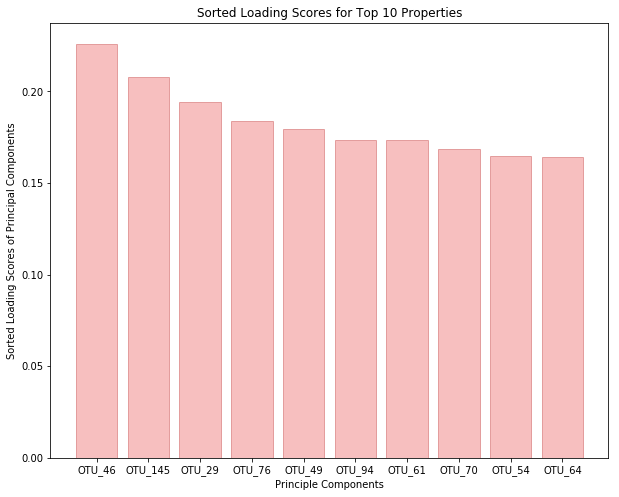

In [37]:
#Rough plot of top ten PCs
#Initialize figure
fig2 = plt.figure(figsize=(10,8))

#Plot histogram
plt.bar(list(sorted_t.index)[0:10],sorted_t['Loading Score'].iloc[0:10], edgecolor = 'indianred', color = 'lightcoral', alpha=0.5)

#Titles and lables
plt.ylabel('Sorted Loading Scores of Principal Components')
plt.xlabel('Principle Components')
plt.title('Sorted Loading Scores for Top 10 Properties')

plt.show()

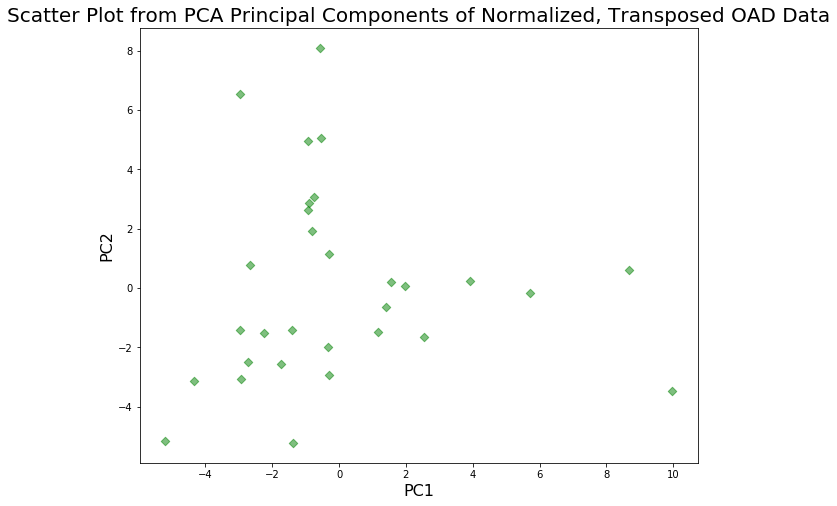

In [20]:
#Scatter Plot of transposed data
#Initialize figure
fig2 = plt.figure(figsize=(10,8))

#Plot histogram
plt.scatter(x = pca_df_t['PC1'], y = pca_df_t['PC2'], alpha=0.5, marker='D', color='green')

#Titles and lables
plt.ylabel('PC2', fontsize=16)
plt.xlabel('PC1', fontsize=16)
plt.title("Scatter Plot from PCA Principal Components of Normalized, Transposed OAD Data", fontsize=20)

plt.show()